# Comparing Dictionary Sequencing to Selected SN130 Enhancers

**Author:** Michelle Franc Ragsac (mragsac@eng.ucsd.edu) 

### Import Necessary Packages

In [1]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('mode.chained_assignment', None) # disable the setting with copy parning

---

## Import the Filtered Dictionary from the Previous Notebook

In [2]:
# Open the previous notebook's output and preview the contents
df = pickle.load(open('outputs/01_MR_SN-720bc_Preliminary-Filtering-Sequencing-Data_filtered-output.pickle','rb'))
df.head() 

,Raw_Sequence,Raw_Counts_Rep1,Raw_Counts_Rep2,Raw_Counts,hasN,Split_Sequence,Barcode_Length,Number_Of_Splits,Barcode,Enhancer-Read,Enhancer,Enhancer_Length
0,CAACGGGACCACAGCCGGCTAAAGCTTCGTACTAGCTCAATTGGGT...,12498.0,12964.0,25462.0,False,"[CAACGGGACCACAGCCGGCTAAAGCTTCGT, AATTGGGTTCAAA...",30,2,CAACGGGACCACAGCCGGCTAAAGCTTCGT,AATTGGGTTCAAACAGTATCCCATTTTACCCCGCAGTACTATATTC...,CAGTTGCAAAGTAAGACATAGGAATATAGTACTGCGGGGTAAAATG...,67
1,AAGCCAGGCGCAAAACAGCGAATGTGAAACACTAGCTCGACTTTCT...,1819.0,1802.0,3621.0,False,"[AAGCCAGGCGCAAAACAGCGAATGTGAAAC, GACTTTCTCCCAA...",30,2,AAGCCAGGCGCAAAACAGCGAATGTGAAAC,GACTTTCTCCCAAGCACGCGGCTATCCAGGCCGCAGTGTGTGATCC...,GGAGTTCAGACGAGGAGAAACCAGCCTTCCGAAAGCACGCAGCGTG...,94
2,CGGGAAACAAGCAAATGTACGACAATATGAACTAGCTCGATTAATC...,2790.0,2740.0,5530.0,False,"[CGGGAAACAAGCAAATGTACGACAATATGA, GATTAATCTGGGG...",30,2,CGGGAAACAAGCAAATGTACGACAATATGA,GATTAATCTGGGGAATAATGGAATATAATACTGCGGGGTAAAATGG...,CATTATTTGCTAACGGTATCCCATTTTACCCCGCAGTATTATATTC...,66
3,ATATTGAATACGTAGACGACATAGATGCTCACTAGCTCATAGTTTA...,5508.0,5925.0,11433.0,False,"[ATATTGAATACGTAGACGACATAGATGCTC, ATAGTTTATGTCG...",30,2,ATATTGAATACGTAGACGACATAGATGCTC,ATAGTTTATGTCGTGAATAGGGATCCATGCCCGCAGTTGGCTCATC...,CTTTTGCAGATATTAATACTGGATGAGCCAACTGCGGGCATGGATC...,67
4,ATGGCATGAAATGGGCGACCAGAGACACTCACTAGCTCGCACCTTA...,3932.0,3755.0,7687.0,False,"[ATGGCATGAAATGGGCGACCAGAGACACTC, GCACCTTATCAAT...",30,2,ATGGCATGAAATGGGCGACCAGAGACACTC,GCACCTTATCAATGGATGCTACCAATGTATCACAGCGGTGAACTCT...,GTTCAGGATTGTCACTACAGCTAGAGTTCACCGCTGTGATACATTG...,68


## Import the Expected SN Library Enhancers 

In [3]:
# Import the selected enhancers that were ordered and sent off for sequencing 
enh = pd.read_csv('../20191025_MR_Selected-SN-Library-Enhancers.txt',header=None)

# There are still adapters added to all of the sequences, so remove those first before previewing the dataframe
prime5 = 'CTGGAGTTCAGACGAGGAGAAACCAGCCT'
prime3 = 'GAAAACCATTCTCCTCTTCTAGAGGATCT'

enh.columns = ['Raw_Sequence']
enh['True_Sequence'] = enh.apply(lambda r: r['Raw_Sequence'].replace(prime5,'').replace(prime3,''),axis=1)

print(f"There are a total of {enh.shape[0]} enhancers in our SN library:")
enh.head() # preview the dataframe

There are a total of 130 enhancers in our SN library:


,Raw_Sequence,True_Sequence
0,CTGGAGTTCAGACGAGGAGAAACCAGCCTTTACTTTAAAGTGTAAA...,TTACTTTAAAGTGTAAACACTGGATGCTTACACAGCTGTGCGGCGC...
1,CTGGAGTTCAGACGAGGAGAAACCAGCCTCCCCGGTATATTCACCG...,CCCCGGTATATTCACCGACAAATACGTAACGACTGCGGATCAAATT...
2,CTGGAGTTCAGACGAGGAGAAACCAGCCTTACAACCTATTTCCGGG...,TACAACCTATTTCCGGGATTCGAACCCAATACTGCGGATTACGTTT...
3,CTGGAGTTCAGACGAGGAGAAACCAGCCTTTTTACATTTATTTAAA...,TTTTACATTTATTTAAAATCCAAATTTTCCCACAGCTGAATGAAAT...
4,CTGGAGTTCAGACGAGGAGAAACCAGCCTTCACCCGGAAGCTTTTT...,TCACCCGGAAGCTTTTTTGGGACTGACGAAACTGCGGTCGATTCAG...


---

## Determine the Dictionary Members that have an Exact versus Non-Exact Match to the SN130 Set

In [4]:
df_exact = df.loc[df['Enhancer'].isin(enh['True_Sequence'])]
df_not_exact = df.loc[~(df['Enhancer'].isin(enh['True_Sequence']))]

print(f"EXACT MATCH: There are {df_exact.shape[0]} unique sequences, Barcode-Enhancer Combinations ({len(df_exact['Enhancer'].unique())} enhancers, {df_exact['Raw_Counts'].sum()} reads)")
print(f"NOT EXACT  : There are {df_not_exact.shape[0]} unique sequences, Barcode-Enhancer Combinations ({len(df_not_exact['Enhancer'].unique())} enhancers, {df_not_exact['Raw_Counts'].sum()} reads)")

EXACT MATCH: There are 640 unique sequences, Barcode-Enhancer Combinations (98 enhancers, 4824810.0 reads)
NOT EXACT  : There are 59 unique sequences, Barcode-Enhancer Combinations (42 enhancers, 585803.0 reads)


In [5]:
# Store whether or not an enhancer is an exact or not exact match within the column
df['Type_of_Match'] = df.apply(lambda r: 'EXACT_MATCH' if r['Enhancer'] in list(enh['True_Sequence']) else 'NOT_EXACT_MATCH', axis=1)

### Visualize the Correlation Between Exact or Non-Exact Enhancer Matches and Enhancer Length

We know that our enhancers should be between 69~70 bp. 

We can compare that information to whether or not an enhancer indicated it was an exact or non-exact match to the set of enhancers that we ordered to include within our library.

/home/mragsac/miniconda3/envs/analysis/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


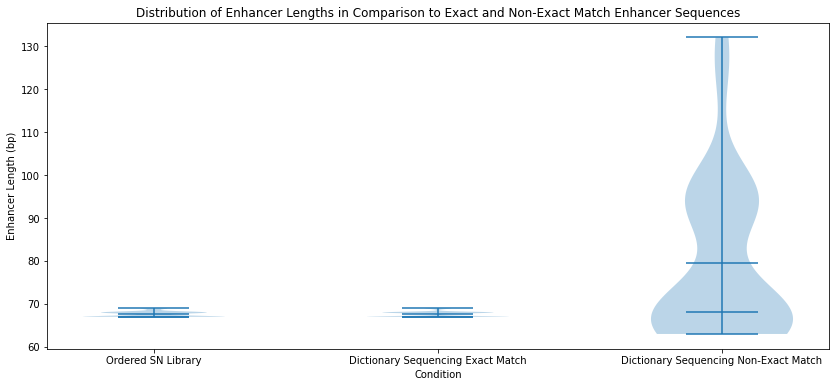

In [6]:
plt.figure(figsize=(14,6));

# Separate the data based on the type of match the enhancer had
data = [list(enh.apply(lambda r: len(r['True_Sequence']), axis=1)),
        list(df.loc[df['Type_of_Match'] == "EXACT_MATCH"]['Enhancer_Length']),
        list(df.loc[df['Type_of_Match'] == "NOT_EXACT_MATCH"]['Enhancer_Length'])]

# Plot the distribution of enhancer lengths
plt.violinplot(data,showmeans=True,showextrema=True,showmedians=True,points=600);
plt.title("Distribution of Enhancer Lengths in Comparison to Exact and Non-Exact Match Enhancer Sequences");
plt.xlabel("Condition");
plt.xticks([1.0,2.0,3.0],['Ordered SN Library','Dictionary Sequencing Exact Match','Dictionary Sequencing Non-Exact Match']);
plt.ylabel("Enhancer Length (bp)");

---

## Filter for Enhancers with the Proper Length

Based on the distributions of enhancer lengths between the SN Library that we ordered versus the exact and non-exact matches from the dictionary sequencing of our library, we have a maximum enhancer length of ~70 bp. For the non-exact matches, we can see that there are many outliers that are present. As a next step, we can filter out these outliers to hopefully have a set of "true" enhancers to use in our future analyses.

In [7]:
print(f"The maximum enhancer length present within the SN library we ordered is: {enh.apply(lambda r: len(r['True_Sequence']), axis=1).max()} bp")
print(f"The minimum enhancer length present within the SN library we ordered is: {enh.apply(lambda r: len(r['True_Sequence']), axis=1).min()} bp")

The maximum enhancer length present within the SN library we ordered is: 69 bp
The minimum enhancer length present within the SN library we ordered is: 67 bp


In [8]:
df_filtMax = df.loc[df['Enhancer_Length'] <= 69]
df_filtMax_filtMin = df_filtMax.loc[df_filtMax['Enhancer_Length'] >= 67]

print(f"Before Filtering: There are {df.shape[0]} unique sequences in the dictionary ({df['Raw_Counts'].sum()} reads)")
print(f"-1- Removing >69: There are {df_filtMax.shape[0]} unique sequences in the dictionary ({df_filtMax['Raw_Counts'].sum()} reads)")
print(f"-2- Removing <67: There are {df_filtMax_filtMin.shape[0]} unique sequences in the dictionary ({df_filtMax_filtMin['Raw_Counts'].sum()} reads)\n")

Before Filtering: There are 699 unique sequences in the dictionary (5410613.0 reads)
-1- Removing >69: There are 675 unique sequences in the dictionary (5226391.0 reads)
-2- Removing <67: There are 654 unique sequences in the dictionary (4996554.0 reads)



In [9]:
print("Evaluating the Enhancers and Barcodes Left in the Analysis")
print("==========================================================")

print(f"Number of Exact Match Enhancers:\t{len(df_filtMax_filtMin.loc[df_filtMax_filtMin['Type_of_Match'] == 'EXACT_MATCH']['Enhancer'].unique())}")
print(f"-----Unique Enhancer-Barcode Matches:\t{df_filtMax_filtMin.loc[df_filtMax_filtMin['Type_of_Match'] == 'EXACT_MATCH'].shape[0]}\n")

print(f"Number of Non-Exact Match Enhancers:\t{len(df_filtMax_filtMin.loc[df_filtMax_filtMin['Type_of_Match'] == 'NOT_EXACT_MATCH']['Enhancer'].unique())}")
print(f"-----Unique Enhancer-Barcode Matches:\t{df_filtMax_filtMin.loc[df_filtMax_filtMin['Type_of_Match'] == 'NOT_EXACT_MATCH'].shape[0]}")

Evaluating the Enhancers and Barcodes Left in the Analysis
Number of Exact Match Enhancers:	98
-----Unique Enhancer-Barcode Matches:	640

Number of Non-Exact Match Enhancers:	10
-----Unique Enhancer-Barcode Matches:	14


---

## Determine the Difference Between Non-Exact Matches and Dictionary Sequences

In [10]:
nonExactEnh = df_filtMax_filtMin.loc[df_filtMax_filtMin['Type_of_Match'] == 'NOT_EXACT_MATCH']['Enhancer'].unique()

for seq in nonExactEnh:
    print(f"Enhancer: {seq}\t| Length: {len(seq)}")

Enhancer: TTACTTTAAAGTGTAAACACTGGATGCTTACACAGCTGTGCGGCACCCTATGTTGCCATTGTGGATAT	| Length: 68
Enhancer: GCATCCTTTTTTAACAAGCAGCTATCTTTACCGCAGTCGTAACAATCCCTACACTGCAAGTGTGAAT	| Length: 67
Enhancer: CCCATGGGAGCCTGGATTAGTGGAAATCCCACAGCGGGGTTAGGCATATACATTCTTTGGAAAATTAT	| Length: 68
Enhancer: GTTCAGGTTGTCACTACAGCTAGAGTTCACCGCTGTGATACATTGGTAGCATCCATTGATAAGGTGC	| Length: 67
Enhancer: GTTTTGGATCTTCTATTAATAAATCATCAACCGCAGTGAGAATGTAACGAACAGTTTGTTCTTTTGA	| Length: 67
Enhancer: CAAGCGTGGAAATTTCCTTCAGTTTTCTTGCACAGCTGAATAGTTGTTCTTTACTTTTAATATCATCCA	| Length: 69
Enhancer: CCCCGGTATATTCACCGACAAATACGTAACGACTGCGGATCAAATTTCCATTCTTTCGCACATTTTTG	| Length: 68
Enhancer: CTTCAAACTTGTCCGAATCATCCGTTGTGTCCGCTGTGTCAATCGTTCCAACTCCCAAACCTGAACG	| Length: 67
Enhancer: CTTTTGCAGATATTAATACTGGATGGAGCCAACTGCGGGCATGGATCCTTATTCACGACATAAACTAT	| Length: 68
Enhancer: CCCGGTATATTCACCGACAAATACGTAACGACTGCGGATCAAATTTCCATTCCTTCGCACATTTTTG	| Length: 67


In [11]:
def hamming_distance(seq1,seq2):
    """Helper Method:
    Determines the Hamming Distance (# mismatches) between two sequences
    """
    return(sum([1 for i,j in zip(seq1,seq2) if i != j]))

In [12]:
nonExact_comparisons = {}
for seq in nonExactEnh:
    nonExact_comparisons[seq] = {}
    current_minimum = 1000000
    minimum_matches = []
    
    # Go through all of the enhancers that we ordered/expect to see
    # and determine the "minimum" match (lowest hamming distance) for 
    # diagnostic purposes
    for true_enh in enh['True_Sequence']:
        nonExact_comparisons[seq][true_enh] = hamming_distance(seq,true_enh)
        if nonExact_comparisons[seq][true_enh] < current_minimum: 
            current_minimum = nonExact_comparisons[seq][true_enh]
            minimum_matches = [true_enh]
        elif nonExact_comparisons[seq][true_enh] == current_minimum:
            minimum_matches.append(true_enh)
    
    # Share some diagnostic statements
    print(f"Enhancer: {seq}\t| Length: {len(seq)}")
    print(f"Minimum Hamming Distance to True Enhancer Matches: {current_minimum}")
    for true_enh in minimum_matches:
        print(f"MATCH---{true_enh}")
    print("")

Enhancer: TTACTTTAAAGTGTAAACACTGGATGCTTACACAGCTGTGCGGCACCCTATGTTGCCATTGTGGATAT	| Length: 68
Minimum Hamming Distance to True Enhancer Matches: 1
MATCH---TTACTTTAAAGTGTAAACACTGGATGCTTACACAGCTGTGCGGCGCCCTATGTTGCCATTGTGGATAT

Enhancer: GCATCCTTTTTTAACAAGCAGCTATCTTTACCGCAGTCGTAACAATCCCTACACTGCAAGTGTGAAT	| Length: 67
Minimum Hamming Distance to True Enhancer Matches: 1
MATCH---GCATCCTTTTTTAACAAGCAGCTATCTTTACCGCAGTCGTAACAATCCCCACACTGCAAGTGTGAAT

Enhancer: CCCATGGGAGCCTGGATTAGTGGAAATCCCACAGCGGGGTTAGGCATATACATTCTTTGGAAAATTAT	| Length: 68
Minimum Hamming Distance to True Enhancer Matches: 27
MATCH---CCCATGGGAGCCTGGATTAGTGGAAAGTCCCACAGCGGGGTTAGGCATATACATTCTTTGGAAAATTAT

Enhancer: GTTCAGGTTGTCACTACAGCTAGAGTTCACCGCTGTGATACATTGGTAGCATCCATTGATAAGGTGC	| Length: 67
Minimum Hamming Distance to True Enhancer Matches: 41
MATCH---TATCACTGTCGTGGTACCGGAAAATTTATCCCAGCTGTGATACCGGAAATTTTATCTCAGTCGTGGTAC

Enhancer: GTTTTGGATCTTCTATTAATAAATCATCAACCGCAGTGAGAATGTAACGAACAGTTTGTTCTTTTGA	| Length: 67
Minimum Hamming 

Looking at these results, there are some enhancers that have a single bp difference to the enhancer that we were expecting to see.

To make things easier, we will only consider exact matches, but we can also keep these enhancers in mind as they are in the dictionary.

---

## Determine the Barcodes Associated with Each Unique Enhancer Sequence

In [13]:
# Make the naming easier
df = df_filtMax_filtMin 

# Define two dictionaries to hold the enhancers associated with each
# barcode, and the barcodes associated with each enhancer for easier lookup
barcode2enhancer, enhancer2barcode = {}, {}

# Go through each unique enhancer, and determine its barcodes
for enh in sorted(df['Enhancer'].unique()):
    if enh in nonExactEnh: 
        continue # don't consider exact matches
    
    if enh not in enhancer2barcode:
        enhancer2barcode[enh] = {}
    
    # Gather the rows associated with each enhancer to determine
    # the barcodes associated with the enhancer
    enh_subset = df.loc[df['Enhancer'] == enh]
    for bc in enh_subset['Barcode']:
        if bc not in enhancer2barcode[enh]:
            enhancer2barcode[enh][bc] = []
            
        # Determine the counts of the enhancer-barcode combination
        bc_enh_counts = enh_subset.loc[enh_subset['Barcode'] == bc]['Raw_Counts'].values
        enhancer2barcode[enh][bc] += list(bc_enh_counts)
        
        # Fill out the converse dictionary (bc to enh)
        if bc not in barcode2enhancer:
            barcode2enhancer[bc] = {}
        if enh not in barcode2enhancer[bc]:
            barcode2enhancer[bc][enh] = []
        barcode2enhancer[bc][enh] += list(bc_enh_counts)
        
print(f"Number of Total Barcodes:\t{len(barcode2enhancer)}")
print(f"Number of Total Enhancers:\t{len(enhancer2barcode)}")

# Also determine the unique barcodes (barcode has a unique association with an enhancer)
# and multiple-matched (MM) barcodes (barcode matches to multiple enhancers)
print(f"Number of Unique Barcodes:\t{len({bc:len(barcode2enhancer[bc]) for bc in barcode2enhancer if len(barcode2enhancer[bc]) == 1})}")
print(f"Number of Mult-Mat Barcodes:\t{len({bc:len(barcode2enhancer[bc]) for bc in barcode2enhancer if len(barcode2enhancer[bc]) > 1})}")

Number of Total Barcodes:	640
Number of Total Enhancers:	98
Number of Unique Barcodes:	640
Number of Mult-Mat Barcodes:	0


In [14]:
df['Type_of_Match'].value_counts()

EXACT_MATCH        640
NOT_EXACT_MATCH     14
Name: Type_of_Match, dtype: int64

### Plot the Distribution of Barcodes Associated with Each Enhancer

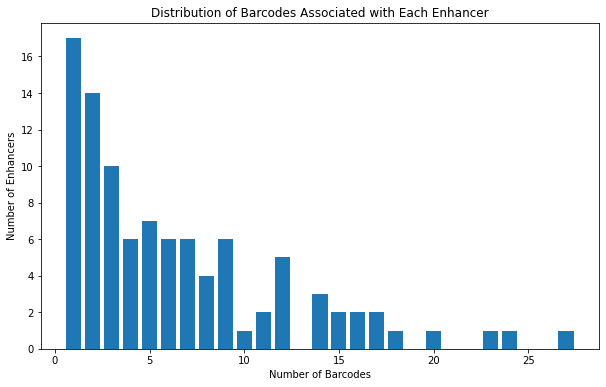

In [15]:
num_barcodes = pd.Series([len(enhancer2barcode[enh]) for enh in enhancer2barcode])

plt.figure(figsize=(10,6));
plt.bar(num_barcodes.value_counts().index,num_barcodes.value_counts());
plt.xlabel('Number of Barcodes');
plt.ylabel('Number of Enhancers');
plt.title('Distribution of Barcodes Associated with Each Enhancer');

In [16]:
print(f"The Mean Number of Barcodes per Enhancer: {num_barcodes.mean()}")
print(f"The Medium Number of Barcodes per Enhancer: {num_barcodes.median()}")

The Mean Number of Barcodes per Enhancer: 6.530612244897959
The Medium Number of Barcodes per Enhancer: 5.0


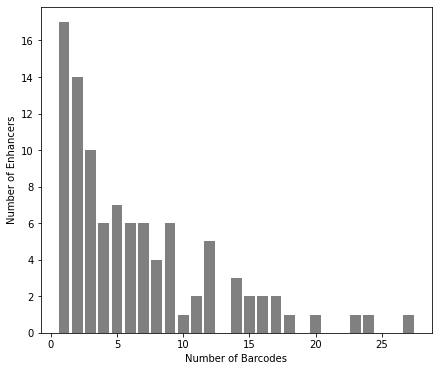

In [17]:
num_barcodes = pd.Series([len(enhancer2barcode[enh]) for enh in enhancer2barcode])

plt.figure(figsize=(7,6));
plt.bar(num_barcodes.value_counts().index,num_barcodes.value_counts(),color='grey');
plt.xlabel('Number of Barcodes');
plt.ylabel('Number of Enhancers');

---

## Export the Evaluated Dictionary

In [18]:
output = ['Barcode_Sequence\tBarcode_Type\tEnhancer_Sequence\tNum_Barcode-Enhancer_Occurences\tTotal_Enhancer_Occurences\tType_of_Match']

print(f"We have a total of {len(enhancer2barcode)} enhancers to export ...",end=" ")

# Export the dictionary as a CSV file for downstream analyses
# and easier human readable interpretation
for enh in enhancer2barcode:
    # Determine the total reads affiliated with the enhancer
    total_reads = sum([enhancer2barcode[enh][bc][0] for bc in enhancer2barcode[enh]])
    
    # Determine the type of match for the enhancer to our SN130 dataset
    type_of_match = df.loc[df['Enhancer'] == enh]['Type_of_Match'].values[0]
    
    # Go through each barcode and add a new line to our output containing:
    # [BARCODE] [BC_TYPE] [ENHANCER_SEQUENCE] [NUM_BC_ENH] [TOTAL_ENH]
    for bc in sorted(enhancer2barcode[enh]):
        output.append( # all of our barcodes are unique
            f"{bc}\tu\t{enh}\t{enhancer2barcode[enh][bc][0]}\t{total_reads}\t{type_of_match}")
        
# Output the file and the dataframe
open('outputs/02_MR_SN-720bc_Comparing-Dictionary-to-SN130_dictionary-output.tsv','w').write('\n'.join(output))
pickle.dump(df,open('outputs/02_MR_SN-720bc_Comparing-Dictionary-to-SN130_filtered-output.pickle','wb'))
print("Done!")

We have a total of 98 enhancers to export ... Done!


### Export the Barcodes Associated with Each Enhancer from the Dictionary

In [19]:
# Determine the number of barcodes associated with each enhancer and the type of match to the SN130 dataset
df_enhNumBC = df.groupby('Enhancer').apply(lambda r: [len(r['Barcode'].unique()), r['Type_of_Match'].unique()[0]]).reset_index()
df_enhNumBC['Number_of_Barcodes'] = df_enhNumBC.apply(lambda r: r[0][0], axis=1)
df_enhNumBC['Type_of_Match'] = df_enhNumBC.apply(lambda r: r[0][1], axis=1)

# Determine the columns we'd like to keep then preview the resulting dataframe
df_enhNumBC = df_enhNumBC[['Enhancer','Number_of_Barcodes','Type_of_Match']]
df_enhNumBC.head()

,Enhancer,Number_of_Barcodes,Type_of_Match
0,AAAACGAAAGTAGTTCCTGATTACAAATTCCCGCAGTAAGCATTTC...,17,EXACT_MATCH
1,AAAAGGAATCTGATTTATCTGGCATCGCCTCCAGCTGTGTTCGTCT...,1,EXACT_MATCH
2,AAAGTCATACGATGGATGACATGCTCCGCAACTGCGGAAATCCGTG...,1,EXACT_MATCH
3,AAATAGTGATGACGTGTCACCTGTCCCACACACAGCTGCTGAACGG...,2,EXACT_MATCH
4,AACCCGGATGTCTCGGCCTTATTCCTTTGAACTGCGGCCGGTGACC...,6,EXACT_MATCH


In [20]:
df_filt = df.loc[df['Enhancer'].isin(enhancer2barcode)]

# Determine the barcodes associated with each enhancer and then preview the resulting dataframe
df_enhToBC = df_filt.groupby('Enhancer').apply(lambda r: ','.join(r['Barcode'].unique())).reset_index()
df_enhToBC.columns = ['Enhancer','Associated_Barcodes']
df_enhToBC.head()

,Enhancer,Associated_Barcodes
0,AAAACGAAAGTAGTTCCTGATTACAAATTCCCGCAGTAAGCATTTC...,"CATAATACAACCCGACGTTGAAGGACGATA,GAAAACGAGAGGATT..."
1,AAAAGGAATCTGATTTATCTGGCATCGCCTCCAGCTGTGTTCGTCT...,AGACCAATGAAAAATGAATAAAAAAACATG
2,AAAGTCATACGATGGATGACATGCTCCGCAACTGCGGAAATCCGTG...,CAGACGAATTTCATTTAATCATCGATATAA
3,AAATAGTGATGACGTGTCACCTGTCCCACACACAGCTGCTGAACGG...,"TTTAGCAATAACCCAAATACACGGAGCCAA,AAAACTTGATGACGT..."
4,AACCCGGATGTCTCGGCCTTATTCCTTTGAACTGCGGCCGGTGACC...,"TTCAATACTAAGAACCCGATTAGAACTACT,CAAAGACTCTCTTCA..."


In [21]:
# Export the outputs 
df_enhNumBC.to_csv('outputs/02_MR_SN-720bc_Comparing-Dictionary-to-SN130_num-bc-per-enhancer.tsv',sep='\t',index=False)
df_enhToBC.to_csv('outputs/02_MR_SN-720bc_Comparing-Dictionary-to-SN130_bc-enhancer-associations.tsv',sep='\t',index=False)
print("Done!")

Done!
